# House price prediction model

In [165]:
import pandas as pd 
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns
from matplotlib import pyplot as plt
print("hellop world")


hellop world


In [166]:
df=pd.read_csv("house_all.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATE,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [199]:
df.columns.value_counts()

CRIM       1
ZN         1
INDUS      1
CHAS       1
NOX        1
RM         1
AGE        1
DIS        1
RAD        1
TAX        1
PTRATIO    1
B          1
LSTATE     1
MEDV       1
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

0

In [37]:
df.shape

(506, 14)

In [278]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATE,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTATE'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

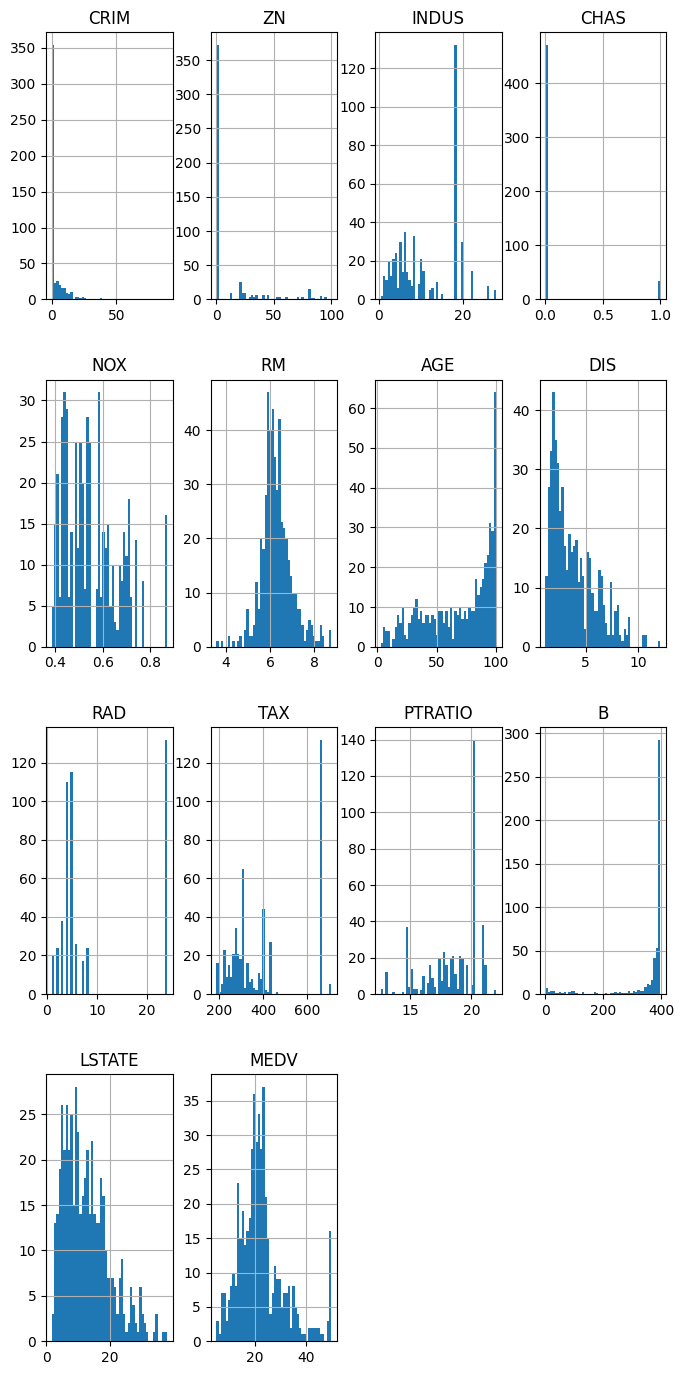

In [9]:
df.hist(bins=50, figsize=(8,17))


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='CRIM', ylabel='MEDV'>,
        <Axes: xlabel='INDUS', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='CRIM', ylabel='RM'>,
        <Axes: xlabel='INDUS', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='CRIM'>,
        <Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>],
       [<Axes: xlabel='MEDV', ylabel='INDUS'>,
        <Axes: xlabel='RM', ylabel='INDUS'>,
        <Axes: xlabel='CRIM', ylabel='INDUS'>,
        <Axes: xlabel='INDUS', ylabel='INDUS'>]], dtype=object)

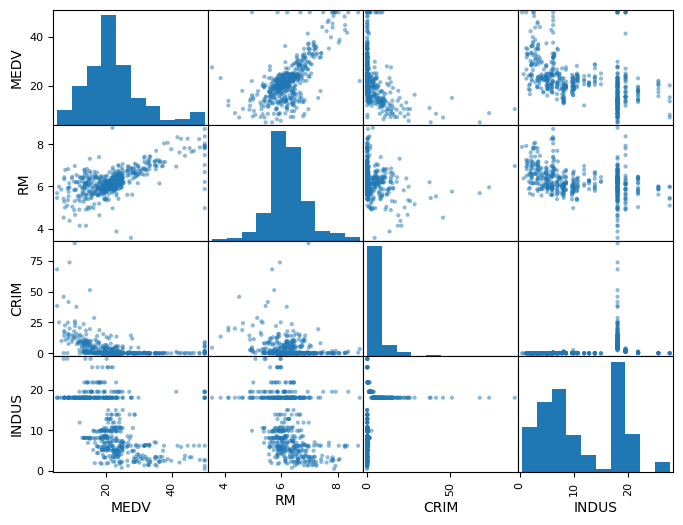

In [251]:
# finding all correlations between the features
corr_matrix=df.corr()
from pandas.plotting import scatter_matrix
attri= ["MEDV","RM","CRIM","INDUS"]
scatter_matrix(df[attri],figsize=(8,6))

In [ ]:
#  Training-Testing Splitting -  all further operations would be based on the the training dataset , do not even touch the test dataset , from the split.

In [313]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataset

# Specify the features (X) and the target variable (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Print the first 10 rows of the training dataset with 'MEDV' column
df_train = X_train.copy()
df_train['MEDV'] = y_train
print(df_train.head(10))


Training set shape: (404, 13) (404,)
Testing set shape: (102, 13) (102,)
         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD  TAX  \
477  15.02340   0.0  18.10     0  0.6140  5.304   97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834   56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031   23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103   85.1  2.0218   24  666   
19    0.72580   0.0   8.14     0  0.5380  5.727   69.5  3.7965    4  307   
325   0.19186   0.0   7.38     0  0.4930  6.431   14.7  5.4159    5  287   
335   0.03961   0.0   5.19     0  0.5150  6.037   34.5  5.9853    5  224   
56    0.02055  85.0   0.74     0  0.4100  6.383   35.7  9.1876    2  313   
437  15.17720   0.0  18.10     0  0.7400  6.152  100.0  1.9142   24  666   
409  14.43830   0.0  18.10     0  0.5970  6.852  100.0  1.4655   24  666   

     PTRATIO       B  LSTATE  MEDV  
477     20.2  349.48   24.91  12.0  
15      21.0  39

In [ ]:
 # Advantages to FIND dthe features correalations
#     1- helps to find the features with most impact on model
#     2- helps to detect the outliers in the data wvery easily hence to enhace the model accuracy the outliers are removed

In [208]:
#  to find features with most impact on regressor model
import pandas as pd
from sklearn.linear_model import LinearRegression

label = ["MEDV"]
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTATE"]

# Assuming you have already defined and initialized the `df` DataFrame

model = LinearRegression()
y = df_train[label]
X = df_train[features]
model.fit(X, y)

# Retrieving the coefficients or feature importances
feature_importances = pd.Series(model.coef_[0], index=features)
feature_importances.abs().sort_values(ascending=False)

           

NOX        17.202633
RM          4.438835
CHAS        2.784438
DIS         1.447865
PTRATIO     0.915456
LSTATE      0.508571
RAD         0.262430
CRIM        0.113056
INDUS       0.040381
ZN          0.030110
B           0.012351
TAX         0.010647
AGE         0.006296
dtype: float64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATE,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


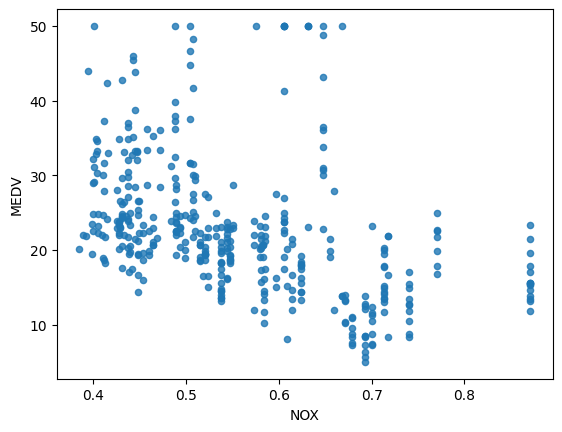

In [180]:
df_train.plot(kind="scatter",x="NOX",y="MEDV",alpha=0.8)
df_train.describe()

In [ ]:
#  remove all the outliers in all the features for top 5 co relations

In [210]:
# removing oultiers from "DIS"
import seaborn as sns
import matplotlib.pyplot as plt

x1 = df_train["PTRATIO"]
q1 = x1.quantile(0.25)
q3 = x1.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Removing outliers from the "DIS" column
# df["RM"] = df["RM"[(x1 >= lower_bound) & (x1 <= upper_bound)]


# Plotting the filtered values without outliers
# sns.scatterplot(df[(df["PTRATIO"]< lower_bound) | (df["PTRATIO"]> upper_bound)], color="green")

# plt.xlabel("rm")
# plt.title("WITH outliers IN DIS")
# plt.figure(figsize=(44,33))
# plt.show()
print(df_train[(df_train["PTRATIO"]< lower_bound) | (df_train["PTRATIO"]> upper_bound)].count())

df_train=df_train[(df_train["PTRATIO"]>= lower_bound) & (df_train["PTRATIO"]<= upper_bound)]
df_train.shape


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTATE     0
MEDV       0
dtype: int64


(404, 14)

In [214]:
# replacing the outliers in NOX

x1 = df_train["NOX"]
q1 = x1.quantile(0.25)
q3 = x1.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(df_new[(df_new["NOX"]<lower_bound) |  (df_new["NOX"] > upper_bound)].count())
df_train["NOX"] = df_train["NOX"].apply(lambda x: x if (lower_bound <= x <= upper_bound) else x1.mean())
df_train.shape

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTATE     0
MEDV       0
dtype: int64


(404, 14)

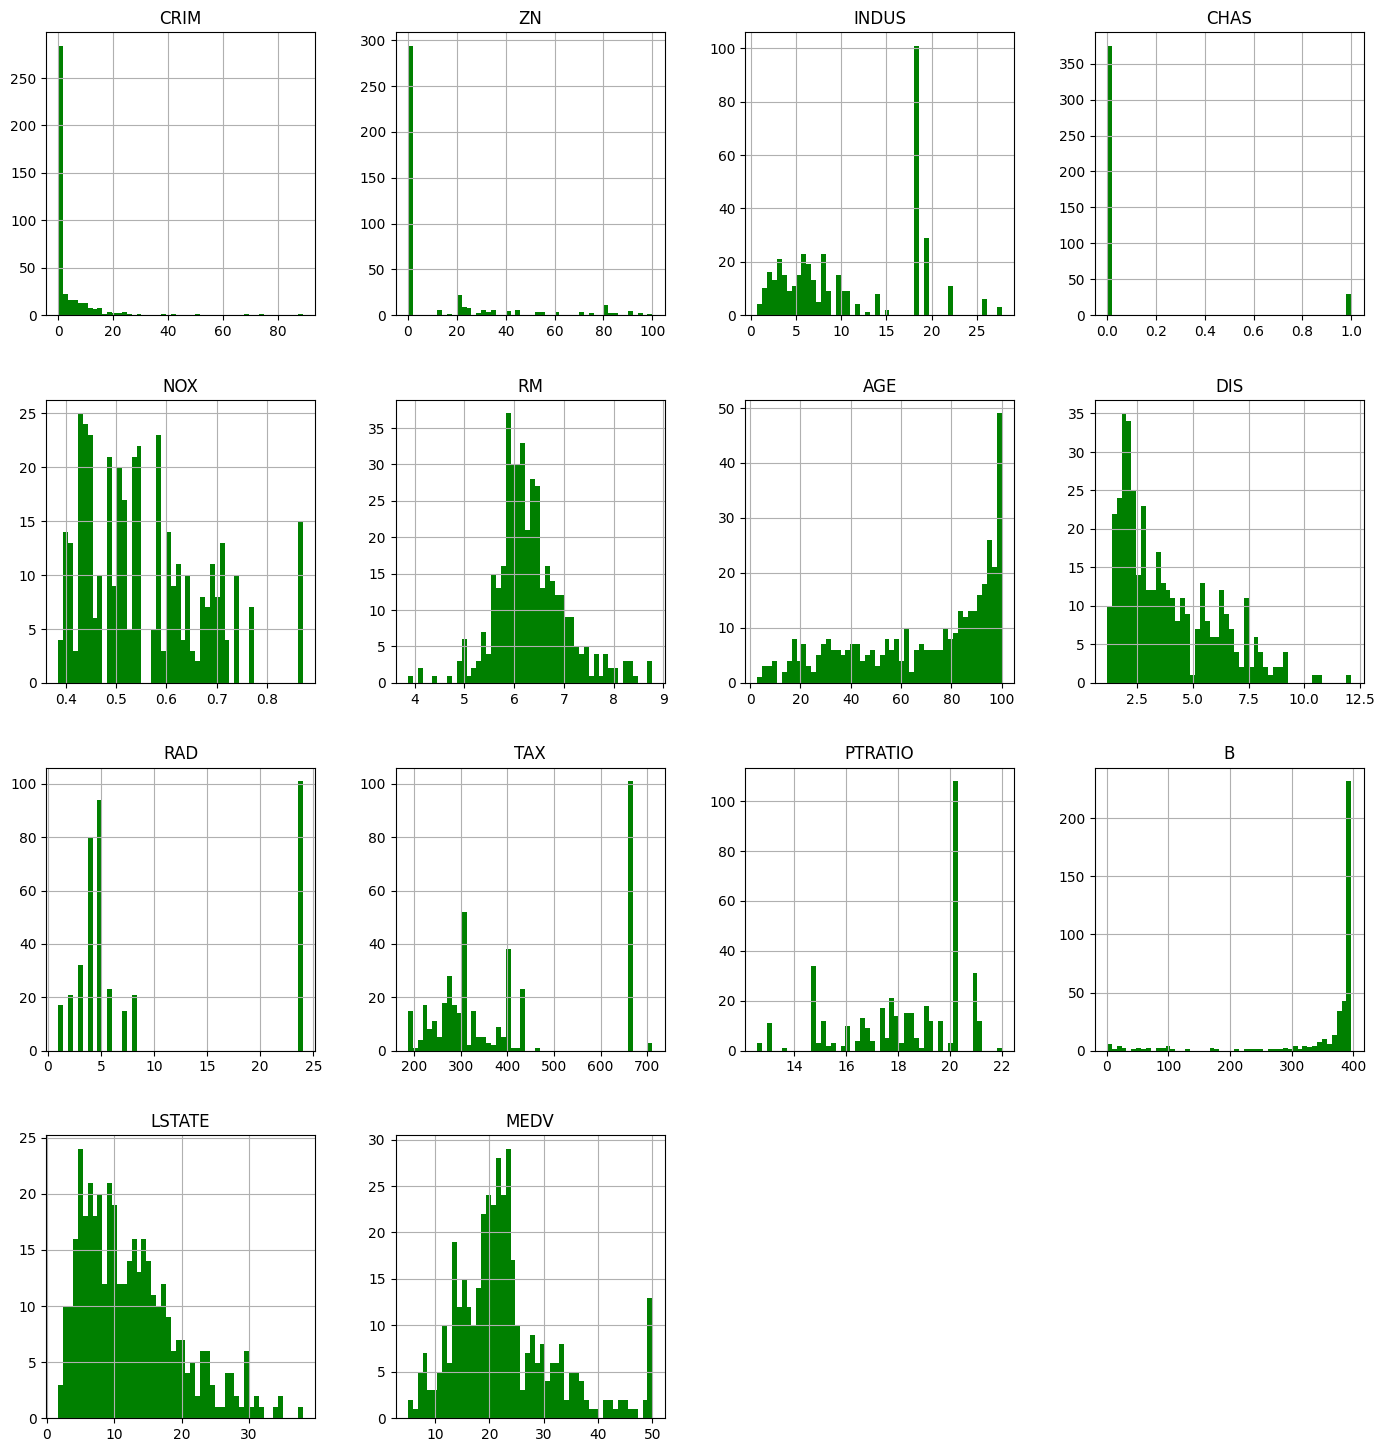

In [216]:
df_train.hist(bins=50,figsize=(17,18),color="green")
df_train.hist?

In [217]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATE,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [223]:
df_new_train=df_train
housing=df_new_train.drop('MEDV',axis=1)
housing_labels = df_new_train["MEDV"]
df_new.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
# Using Imputer for imputing

In [224]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [225]:
imputer.statistics_.shape

(13,)

In [226]:
X=imputer.transform(df_new)
df2=pd.DataFrame(X,columns=df_new.columns)
df2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [74]:
#  Creating a pipeline - for feature scaling
# 1 NORMALIZATION - (value--min)/(max-min)
# 2 STANDARDISATION -(value-mean)/std

In [320]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler())
])
df_num_transformations=pline.fit_transform(housing)
df_num_transformations.shape

(404, 13)

In [231]:
#  Selecting the Model
df_num_transformations.shape
housing_labels.shape

(404,)

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(df_num_transformations,housing_labels)

RandomForestRegressor()

In [292]:
df_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [293]:
sample_data_feature_from_training_dataset= housing.iloc[:10]
sample_data_labels=housing_labels.iloc[:10]
new_sample_testing_data_model= pline.transform(sample_data_feature_from_training_dataset)

In [294]:
model.predict(new_sample_testing_data_model)

array([12.554, 19.689, 19.902, 12.938, 18.759, 24.326, 20.898, 24.059,
        9.042, 22.837])

In [295]:
sample_data_labels.tolist()

[12.0, 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7, 8.7, 27.5]

In [ ]:
#  Evaluating the Model

In [296]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(df_num_transformations)
line_mse= mean_squared_error(housing_labels,housing_prediction)
line_rmse=np.sqrt(line_mse)

In [297]:
line_mse

2.034364556930694

In [ ]:
#  K -fold Cross Validation

In [300]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,df_num_transformations,housing_labels,scoring='neg_mean_squared_error', cv=10)

In [311]:
rmse=np.sqrt(-scores)
model_quality(rmse)

 score :  [3.14207375 3.42306999 2.5149374  5.41768983 5.2605134  2.97138209
 3.72798918 2.62311128 2.6516669  4.58277994]
Mean score :  3.6315213760188683
Standard deviation score :  1.0344453590320248


In [280]:
rmse.std()

1.155481116398368

In [278]:
def model_quality(scores):
    print(" score : " , scores)
    print("Mean score : " , scores.mean())
    print("Standard deviation score : " , scores.std())

#    Models:
    1. Decision Tree Model
                score :  [3.94776874 4.29775892 4.56235925 7.08338833 5.79987069 3.67919828
                 5.00674545 4.86382051 4.21141306 7.05423632]
                Mean score :  5.050655955890159
                Standard deviation score :  1.155481116398368,
                    
     2. Linear Regression Model 
                score :  [3.76298481 4.25110998 5.34719644 6.71464778 4.59265163 5.17395941
                 4.43145447 4.5777583  3.6723473  5.77030866]
                Mean score :  4.8294418804542785
                Standard deviation score :  0.8896329730748528,
      3. Random Forest model
                 score :  [3.14207375 3.42306999 2.5149374  5.41768983 5.2605134  2.97138209
                 3.72798918 2.62311128 2.6516669  4.58277994]
                Mean score :  3.6315213760188683
                Standard deviation score :  1.0344453590320248

In [ ]:
#  Model saving

In [312]:
from joblib import dump, load
dump(model,"Model.joblib")

['Model.joblib']

In [ ]:
#  Model Testing

In [325]:
prepared_test=pline.transform(X_test)
prediction= model.predict(prepared_test)
mse_value=mean_squared_error(y_test,prediction)
rmse_final=np.sqrt(mse_value)
rmse_final

3.050986920043172

In [324]:
rmse_final

3.050986920043172

In [330]:
print(list(y_test))
print(list(prediction))

[23.6, 32.4, 13.6, 22.8, 16.1, 20.0, 17.8, 14.0, 19.6, 16.8, 21.5, 18.9, 7.0, 21.2, 18.5, 29.8, 18.8, 10.2, 50.0, 14.1, 25.2, 29.1, 12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15.0, 20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50.0, 17.4, 22.6, 15.1, 13.1, 24.2, 19.9, 24.0, 18.9, 35.4, 15.2, 26.5, 43.5, 21.2, 18.4, 28.5, 23.9, 18.5, 25.0, 35.4, 31.5, 20.2, 24.1, 20.0, 13.1, 24.8, 30.8, 12.7, 20.0, 23.7, 10.8, 20.6, 20.8, 5.0, 20.1, 48.5, 10.9, 7.0, 20.9, 17.2, 20.9, 9.7, 19.4, 29.0, 16.4, 25.0, 25.0, 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23.0, 50.0, 17.9, 9.6, 17.2, 22.5, 21.4]
[22.862999999999992, 30.33899999999999, 16.887000000000004, 23.367999999999988, 16.794999999999998, 21.072000000000003, 19.776, 15.565999999999988, 21.330000000000013, 21.151000000000007, 20.17299999999999, 19.417999999999996, 8.350999999999997, 21.512000000000004, 19.772000000000006, 26.395999999999994, 19.070999999999998, 8.482999999999997, 46.025000000000006, 14.845999999999988, 24.6019

In [331]:
y_test.mean()

21.488235294117644

In [332]:
prediction.mean()

21.392460784313727

The given model is highly efficient 